In [2]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

df = pd.read_csv("assets/diamonds.csv")

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(df["cut"].unique())
print(df["color"].unique())
print(df["clarity"].unique())

df.describe()

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## idea

- price comparissons regression etc vs cut or clarity, gör en prediktionsmodell för pris mot ngn av dom andra värdena eller korrelation

- jämför störst korrelation på pris av karat mot storlek

- ngn form av stickprovs undersökning hur säker den e, medelfel etc. varians eller standardavikelse på stickprovet för carat

- hypotetstest populationsmedelvärde eller populationsvariansen för 2 olika typer kanske färger


- **kolla korrelation mellan pris och carat, ols prediction model, corr heatmap kolla R^2 värdet, gör ytterligare fördelning på clarity för bättre prediction**

In [4]:
model = ols("price ~ carat", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:55:54   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.0

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_6156\1949575849.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


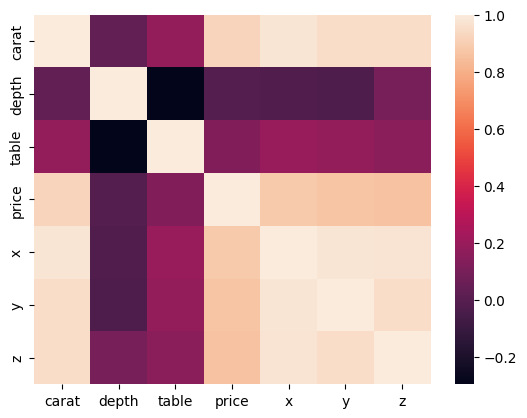

In [11]:
corr = df.corr()

sns.heatmap(corr)
corr

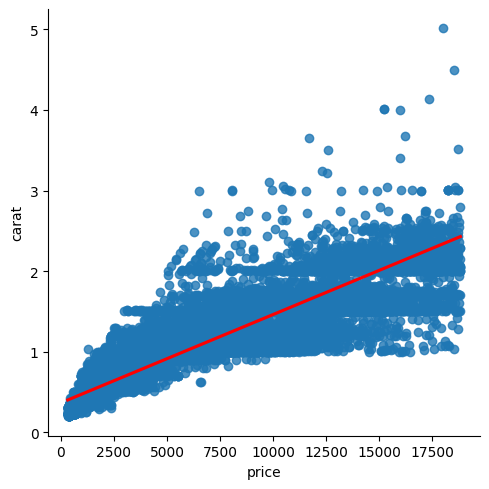

In [15]:
sns.lmplot(data=df, x="price", y="carat", line_kws={"color": "red"})

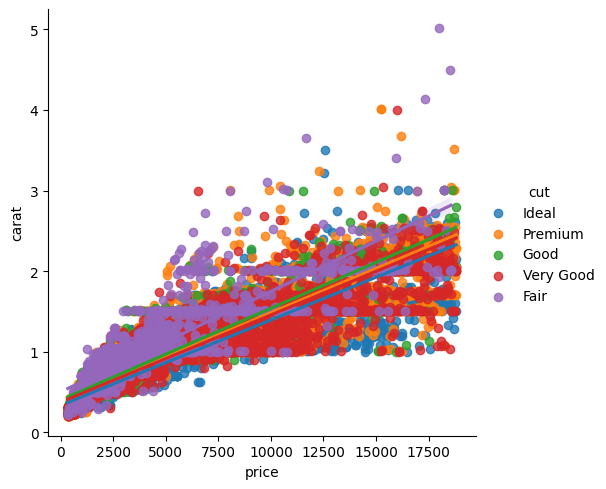

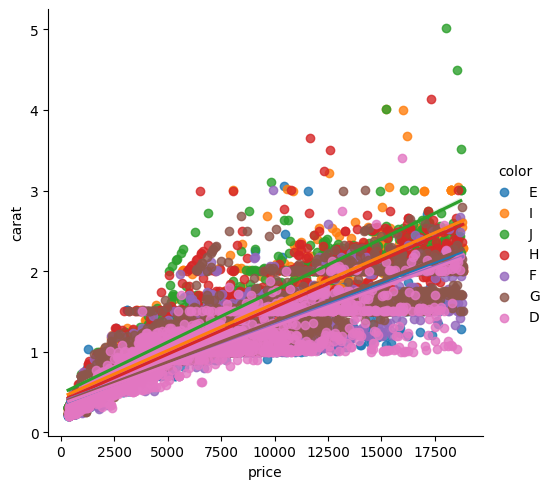

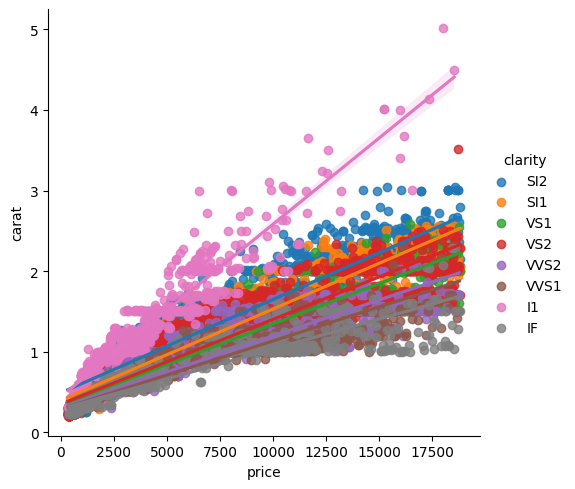

In [16]:
sns.lmplot(data=df, x="price", y="carat", hue="cut")
sns.lmplot(data=df, x="price", y="carat", hue="color")
sns.lmplot(data=df, x="price", y="carat", hue="clarity")

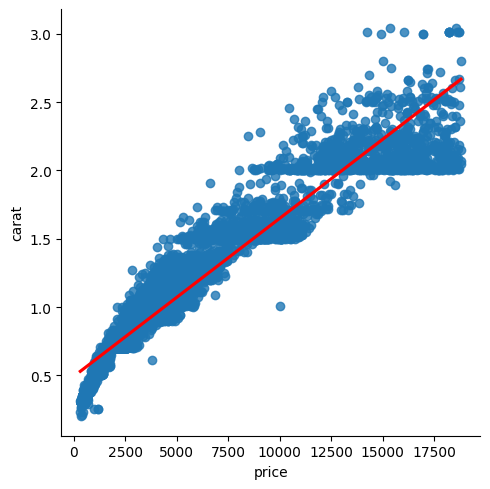

In [18]:
df_clarity = df.query("clarity == 'SI2'")

sns.lmplot(data=df_clarity, x="price", y="carat", line_kws={"color" : "red"})